In [4]:
import pandas as pd 

df = pd.read_csv('als_data.csv')

print(df.head())

   ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0   1        65         57.0            40.5         38.0       0.066202   
1   2        48         45.0            41.0         39.0       0.010453   
2   3        38         50.0            47.0         45.0       0.008929   
3   4        63         47.0            44.0         41.0       0.012111   
4   5        63         47.0            45.5         42.0       0.008292   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  ...  \
0     -0.965608                30                 28.0                22  ...   
1     -0.921717                37                 33.0                21  ...   
2     -0.914787                24                 14.0                10  ...   
3     -0.598361                30                 29.0                24  ...   
4     -0.444039                32                 27.5                20  ...   

   Sodium_min  Sodium_range  SubjectID  trunk_max  trunk

In [5]:
known_relevant_columns = [
    'Age_mean',
    'ALSFRS_slope',
    'ALSFRS_Total_max', 'ALSFRS_Total_median', 'ALSFRS_Total_min',
]


In [6]:
# Identifying columns that are likely relevant based on common prefixes (indicating grouped measurements)
relevant_prefixes = ['Albumin', 'Sodium', 'trunk', 'Urine.Ph']


In [8]:
# Filter columns by checking if they start with any of the relevant prefixes or are in the known relevant list
filtered_columns = [col for col in df.columns if any(col.startswith(prefix) for prefix in relevant_prefixes) or col in known_relevant_columns]

In [9]:
#Create a filtered dataset
als_data_filtered = df[filtered_columns]

In [11]:
# Display the shape of the original vs filtered dataset
original_shape = df.shape
filtered_shape = als_data_filtered.shape
als_data_filtered.head(), original_shape, filtered_shape

(   Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
 0        65         57.0            40.5         38.0       0.066202   
 1        48         45.0            41.0         39.0       0.010453   
 2        38         50.0            47.0         45.0       0.008929   
 3        63         47.0            44.0         41.0       0.012111   
 4        63         47.0            45.5         42.0       0.008292   
 
    ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  \
 0     -0.965608                30                 28.0                22   
 1     -0.921717                37                 33.0                21   
 2     -0.914787                24                 14.0                10   
 3     -0.598361                30                 29.0                24   
 4     -0.444039                32                 27.5                20   
 
    Sodium_max  Sodium_median  Sodium_min  Sodium_range  trunk_max  \
 0       148.0          14

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
# Fit the scaler to data and transform 
scaled_data = scaler.fit_transform(als_data_filtered)

In [15]:
# Convert back into data frame 
als_data_scaled = pd.DataFrame(scaled_data, columns=als_data_filtered.columns)

In [16]:
# Display first few rows of scaled data frame 
print(als_data_scaled.head())

   Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0  0.917137     3.089417       -1.300781    -0.866550       5.480929   
1 -0.574879    -0.622016       -1.112401    -0.553303      -0.347725   
2 -1.452535     0.924415        1.148162     1.326179      -0.507103   
3  0.741606    -0.003443        0.017880     0.073191      -0.174361   
4  0.741606    -0.003443        0.583021     0.386438      -0.573670   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  \
0     -0.381450         -0.318520             0.134960          0.247368   
1     -0.310907          0.998995             0.888863          0.130839   
2     -0.299769         -1.447819            -1.975969         -1.150976   
3      0.208801         -0.318520             0.285741          0.480425   
4      0.456831          0.057913             0.059570          0.014311   

   Sodium_max  Sodium_median  Sodium_min  Sodium_range  trunk_max  \
0    1.959640       2.992342    2.300470 

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

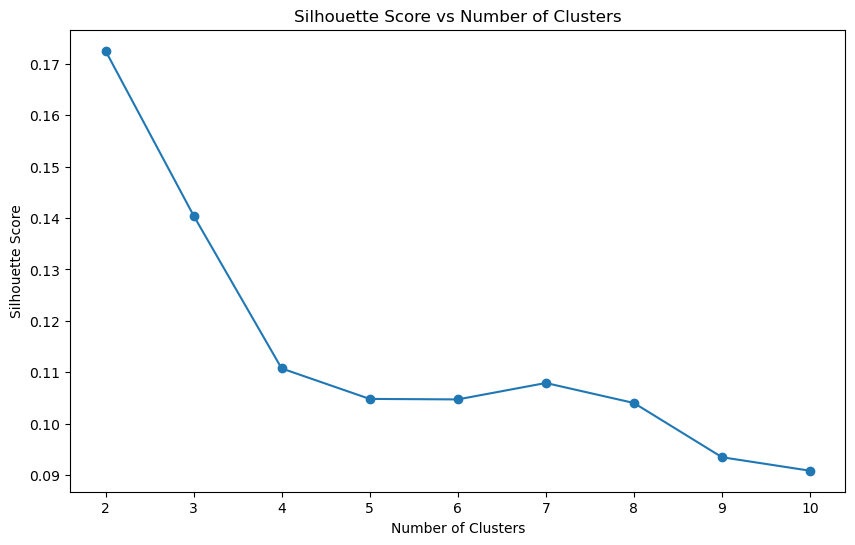

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize lists to store the values of silhouette scores and the corresponding number of clusters
silhouette_scores = []
cluster_range = range(2, 11) 

for n_clusters in cluster_range:
    # Initialize the KMeans object with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model and predict cluster indices
    cluster_labels = kmeans.fit_predict(als_data_scaled)  # Use your scaled DataFrame here
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(als_data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.show()


Evaluating the silhouette score shows that the optimal number of clusters would be 2, based off the highest peak on the plot. 

In [18]:
n_optimal_clusters = 2 

# Initialize KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=n_optimal_clusters, random_state=42)

# Fit the model to the scaled data and predict the cluster labels
cluster_labels_optimal = kmeans_optimal.fit_predict(als_data_scaled)

als_data_filtered['Cluster_Labels'] = cluster_labels_optimal 

print(als_data_filtered['Cluster_Labels'].value_counts())

Cluster_Labels
1    1160
0    1063
Name: count, dtype: int64


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/g7/5d4ykcq51t97dsfc9rqcy9d80000gn/T/ipykernel_6724/349237118.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  als_data_filtered['Cluster_Labels'] = cluster_labels_optimal


In [19]:
from sklearn.decomposition import PCA
import pandas as pd

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Apply PCA to the scaled data
pca_features = pca.fit_transform(als_data_scaled) 

# Create a DataFrame with the PCA features
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])

# Display the first few rows
print(pca_df.head())


       PCA1      PCA2
0 -0.968197  0.519921
1 -1.715314  1.418255
2  2.949269 -3.291343
3 -0.159683  0.076337
4  0.131168 -0.531898


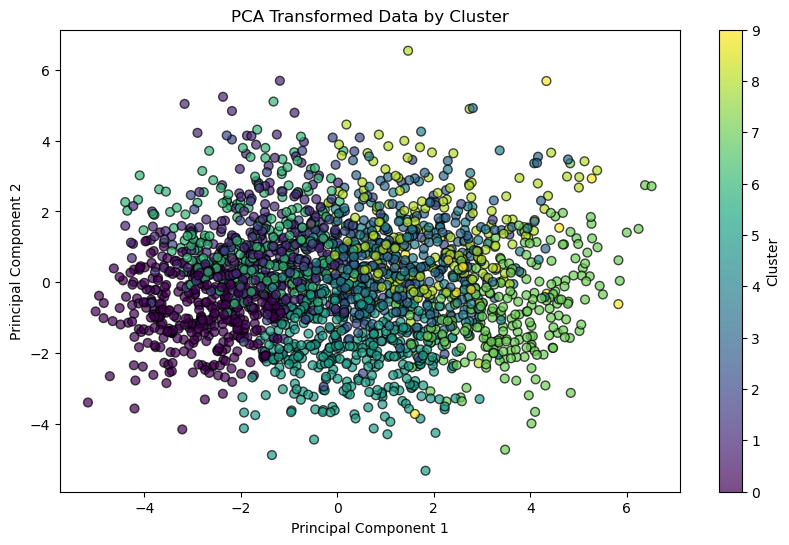

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels 

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=40, alpha=0.7)
plt.title('PCA Transformed Data by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In conclusion, by preprocessing and cleaning the ALS dataset by applying K-means clustering with an optimal number of 2 clusters determined through silhouette scores, distinct patient groupings were identified. PCA reduction to two dimensions allowed for a clear visulaization of these clusters, showing a  meaningful seperation of the data. This suggests the presence of distinct subgroups within the ALS patient population, which could correlate with different disease phenotypes or progression patterns. These findings could have implications for personalized care and targeted research. Further analysis would be reccomended to explore clinical characteristics of each cluster and to validate findings in larger independednt cohorts. 